In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

[5.         3.60555128 3.35410197 2.         1.80277564 1.80277564]


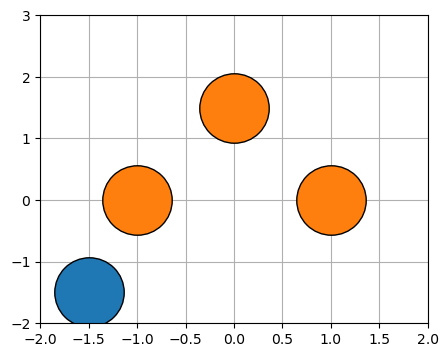

In [2]:
atomlist = []
positions = [np.array([-1.5,-1.5]), np.array([-1.0,0.0]), np.array([1.0,0.0]), np.array([0.0, 1.5])]
colors = ["C0", "C1", "C1", "C1"]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,3.0])
for position, color in zip(positions, colors):
    atom = Atom(position=position, color=color)
    atomlist.append(atom)
ax.grid()
atom_col = Atom_Collection(atomlist=atomlist)
atom_col.calculator = LennardJones()
atom_col.plot(ax=ax)
E_lim = 5.0
xs = np.linspace(-3.0, 3.0, 200)
ys = np.linspace(-3.0, 3.0, 200)
energies = np.zeros(shape=(len(ys), len(xs)))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        atom_col.set_atom_pos(index=0, pos=np.array([x, y]))
        E = atom_col.get_potential_energy()
        if E > E_lim:
            energies[j][i] = E_lim #WE SET LARGE VALUES TO CAP AT E_lim
        else:
            energies[j][i] = E
atom_col[0].pos = positions[0]
print(atom_col.get_distances())

In [7]:
atoms_for_freeze = [1,2,3]
atom_col.freeze_atoms(indices=atoms_for_freeze)
optimizer = Random_Searcher(atom_col=atom_col, step_size=0.1)
opt_cols = optimizer.line_search(atom_col, N_max=400, fmax=0.05, track=True)

In [8]:
path = np.zeros(shape=(len(opt_cols), 2))
pot_steps = []
for i,col in enumerate(opt_cols):
    atom = col[0]
    path[i] = atom.pos
    pot_steps.append(col.get_potential_energy())

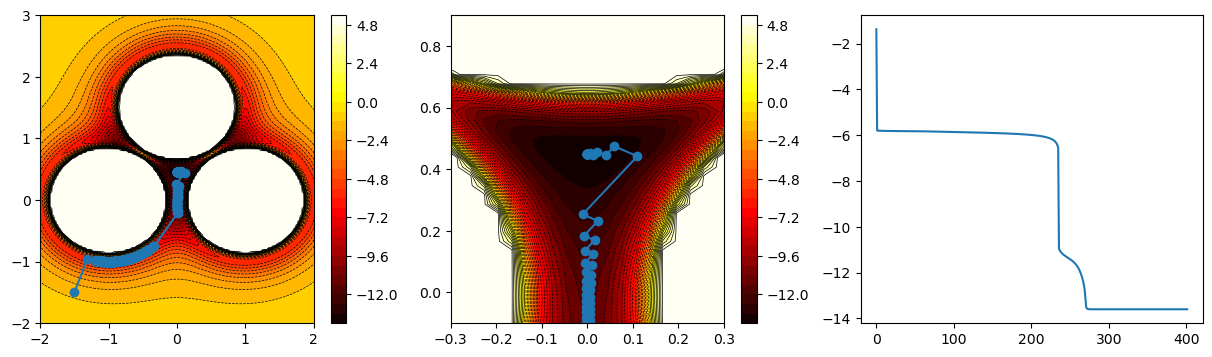

In [9]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_xlim([-2.0,2.0])
axs[0].set_ylim([-2.0,3.0])
axs[1].set_xlim([-0.3,0.3])
axs[1].set_ylim([-0.1,0.9])
Xi, Yi = np.meshgrid(xs, xs)
axs[2].plot(np.linspace(0, len(pot_steps), len(pot_steps)), pot_steps)
for ax in axs[0:2]:
    ax.contour(Xi, Yi, energies, levels=30, linewidths=0.5, colors='k')
    cntr1 = ax.contourf(Xi, Yi, energies, levels=30, cmap="hot")
    ax.plot(path[:,0], path[:,1], "o-")
    fig.colorbar(cntr1, ax=ax)

In [10]:
print(opt_cols[-1].get_forces())

[[ 9.77186099e-05 -4.20715618e-03]
 [ 1.31753719e+01  6.25599903e+00]
 [-1.31754430e+01  6.25600297e+00]
 [-2.66145726e-05 -1.25077948e+01]]
